In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [50]:
df = pd.read_csv('data/2022.csv', delimiter=';')
df.head()

,Date Time,NOx,NO2,NO,SiteID,PM10,NVPM10,VPM10,NVPM2.5,PM2.5,...,SO2,Temperature,RH,Air Pressure,Location,geo_point_2d,DateStart,DateEnd,Current,Instrument Type
0,2022-03-20T07:00:00+00:00,16.5654,13.9982,1.6743,452,13.527,NaN,NaN,NaN,12.0,...,NaN,3.7,NaN,NaN,AURN St Pauls,"51.46282941748531,-2.584540816301439",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
1,2022-03-20T12:00:00+00:00,10.7755,8.7000,1.3537,452,15.459,NaN,NaN,NaN,9.0,...,NaN,9.5,NaN,NaN,AURN St Pauls,"51.46282941748531,-2.584540816301439",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
2,2022-03-20T15:00:00+00:00,12.7055,10.9030,1.1756,452,23.189,NaN,NaN,NaN,8.0,...,NaN,9.8,NaN,NaN,AURN St Pauls,"51.46282941748531,-2.584540816301439",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
3,2022-03-20T21:00:00+00:00,47.3373,46.4088,0.6056,452,39.614,NaN,NaN,NaN,19.0,...,NaN,3.4,NaN,NaN,AURN St Pauls,"51.46282941748531,-2.584540816301439",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)
4,2022-03-21T05:00:00+00:00,38.4043,37.9126,0.3207,452,33.817,NaN,NaN,NaN,29.0,...,NaN,1.7,NaN,NaN,AURN St Pauls,"51.46282941748531,-2.584540816301439",2006-06-15T00:00:00+00:00,NaN,True,Continuous (Reference)


In [51]:
df.shape

(39503, 23)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39503 entries, 0 to 39502
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        39503 non-null  object 
 1   NOx              38790 non-null  float64
 2   NO2              38779 non-null  float64
 3   NO               38779 non-null  float64
 4   SiteID           39503 non-null  int64  
 5   PM10             9190 non-null   float64
 6   NVPM10           0 non-null      float64
 7   VPM10            0 non-null      float64
 8   NVPM2.5          0 non-null      float64
 9   PM2.5            8088 non-null   float64
 10  VPM2.5           0 non-null      float64
 11  CO               0 non-null      float64
 12  O3               4684 non-null   float64
 13  SO2              0 non-null      float64
 14  Temperature      10095 non-null  float64
 15  RH               1503 non-null   float64
 16  Air Pressure     0 non-null      float64
 17  Location    

In [53]:
df.describe()

,NOx,NO2,NO,SiteID,PM10,NVPM10,VPM10,NVPM2.5,PM2.5,VPM2.5,CO,O3,SO2,Temperature,RH,Air Pressure,DateEnd
count,38790.000000,38779.000000,38779.000000,39503.000000,9190.000000,0.0,0.0,0.0,8088.000000,0.0,0.0,4684.000000,0.0,10095.000000,1503.000000,0.0,0.0
mean,65.209339,29.686458,23.160823,409.336000,20.747153,NaN,NaN,NaN,13.454331,NaN,NaN,53.602040,NaN,7.732435,19.585123,NaN,NaN
std,82.936864,23.882318,41.490966,153.984025,13.160829,NaN,NaN,NaN,55.331859,NaN,NaN,25.314616,NaN,4.717842,12.509994,NaN,NaN
min,0.191000,-2.170200,-1.208600,203.000000,-3.768000,NaN,NaN,NaN,-6.000000,NaN,NaN,-0.349200,NaN,-3.600000,0.000000,NaN,NaN
25%,19.299350,13.250000,3.001150,215.000000,12.561000,NaN,NaN,NaN,5.000000,NaN,NaN,40.313000,NaN,4.170900,0.013000,NaN,NaN
50%,39.541150,23.558800,9.750000,452.000000,18.358000,NaN,NaN,NaN,8.000000,NaN,NaN,57.725600,NaN,7.600000,24.793600,NaN,NaN
75%,75.000000,38.750000,24.000000,500.000000,26.087000,NaN,NaN,NaN,13.000000,NaN,NaN,70.747600,NaN,10.500000,29.000000,NaN,NaN
max,1266.750000,238.500000,679.250000,672.000000,531.700000,NaN,NaN,NaN,995.000005,NaN,NaN,147.283000,NaN,25.700000,36.000000,NaN,NaN


In [54]:
df["Date Time"] = pd.to_datetime(df["Date Time"])

In [55]:
df['SiteID'].value_counts()

SiteID
452    4966
500    4939
215    4939
463    4938
203    4938
501    4937
270    4937
672    4909
Name: count, dtype: int64

In [77]:
site_no = 672
pollution_type = 'NO2'

site_df = df[df['SiteID'] == site_no]
site_df = site_df[['Date Time', pollution_type]]
site_df = site_df.set_index('Date Time')
site_df = site_df.sort_index()
site_df = site_df['NO2']
site_df = site_df.resample('H').mean()
site_df = site_df.fillna(method='ffill')


site_df.to_csv(f'data/site_{site_no}_{pollution_type}.csv')

site_df.head()

/var/folders/_k/0mgp9cxj72dcxh4819b8hd740000gn/T/ipykernel_2181/57377258.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  site_df = site_df.resample('H').mean()
/var/folders/_k/0mgp9cxj72dcxh4819b8hd740000gn/T/ipykernel_2181/57377258.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  site_df = site_df.fillna(method='ffill')


Date Time
2022-01-01 00:00:00+00:00    17.50
2022-01-01 01:00:00+00:00    14.00
2022-01-01 02:00:00+00:00    12.00
2022-01-01 03:00:00+00:00     8.75
2022-01-01 04:00:00+00:00     5.75
Freq: h, Name: NO2, dtype: float64

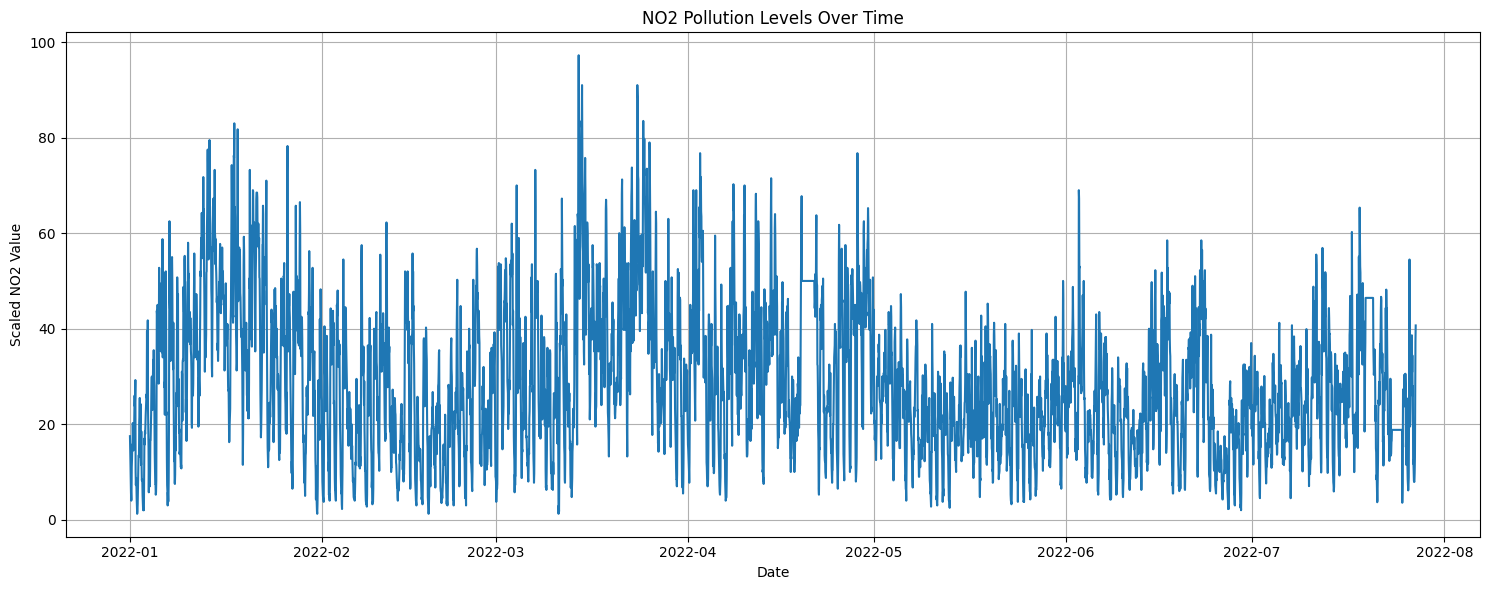

In [78]:

plt.figure(figsize=(15, 6))
plt.plot(site_df)
plt.title('NO2 Pollution Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled NO2 Value')
plt.grid(True)
plt.tight_layout()



In [58]:
result = adfuller(site_df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.398749
p-value: 0.000000


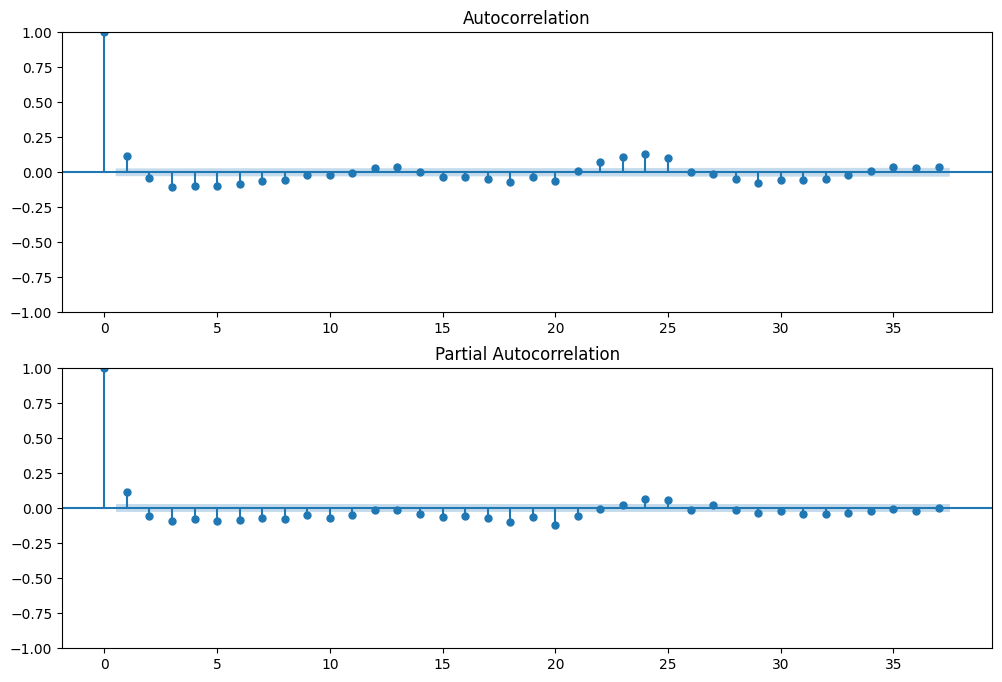

In [ ]:
data_diff = site_df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_diff, ax=ax1)
plot_pacf(data_diff, ax=ax2)
plt.show()

/Users/jaydn/Documents/GitHub/Polution-ARIMA-Analysis/venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                     NO2   No. Observations:                 4978
Model:             SARIMAX(2, 0, 1)x(2, 2, [1, 2], 12)   Log Likelihood              -16730.452
Date:                                 Sun, 17 Aug 2025   AIC                          33476.905
Time:                                         20:56:32   BIC                          33528.968
Sample:                                     01-01-2022   HQIC                         33495.161
                                          - 07-27-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8319      0.007    265.228      0.000       1.818       1

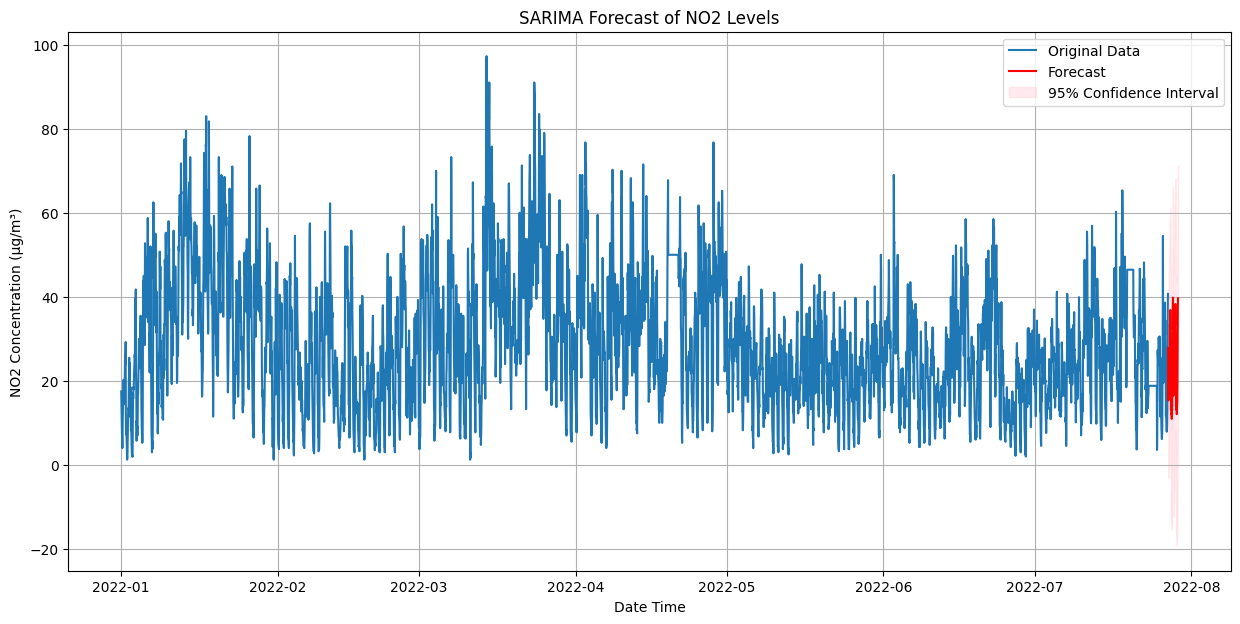

NO2                             mean    mean_se  mean_ci_lower  mean_ci_upper
2022-07-29 05:00:00+00:00  14.311675  16.028282     -17.103180      45.726530
2022-07-29 06:00:00+00:00  18.864282  16.036689     -12.567050      50.295614
2022-07-29 07:00:00+00:00  27.237561  16.052992      -4.225725      58.700846
2022-07-29 08:00:00+00:00  38.161123  16.077622       6.649563      69.672684
2022-07-29 09:00:00+00:00  39.673639  16.110142       8.098341      71.248936


In [ ]:

model = SARIMAX(site_df, order=(2, 0, 1), seasonal_order=(2, 2, 2, 12))

results = model.fit(disp=False)

print(results.summary())


forecast = results.get_forecast(steps=48)
forecast_df = forecast.summary_frame(alpha=0.05)


plt.figure(figsize=(15, 7))
plt.plot(site_df, label='Original Data')
plt.plot(forecast_df['mean'], color='red', label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('SARIMA Forecast of NO2 Levels')
plt.xlabel('Date Time')
plt.ylabel('NO2 Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

print(forecast_df.tail())
